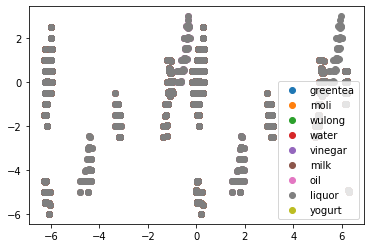

In [6]:
import os
folder_clean = 'D:\\Atom\\python\\data\\cleaned\\grill\\final'

# matls = ['water', 'vinegar', 'milk', 'oil', 'liquor', 'yogurt']
# matls = ['water', 'vinegar', 'milk', 'oil', 'liquor', 'yogurt']
# matls = ['greentea', 'moli', 'wulong', 'water', 'vinegar', 'milk', 'oil', 'liquor', 'yogurt', 'colanosugar', 'cola']

matls = ['greentea', 'moli', 'wulong', 'water', 'vinegar', 'milk', 'oil', 'liquor', 'yogurt']
d_p = []
d_r = []
f = []
y = []
colors =['red','green',"blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta"]
for matl in matls:
    df_f = pd.read_csv(os.path.join(folder_clean, 'd7_%s_f_kde.csv' % (matl)))
    df_t = pd.read_csv(os.path.join(folder_clean, 'd7_%s_t_kde.csv' %(matl)))
    diff_p = np.unwrap(df_f['PHASE']) - np.unwrap(df_t['PHASE'])
    diff_r = df_f['RSSI'] - df_t['RSSI']
    
    d_p.extend(diff_p)
    d_r.extend(diff_r)
    f.extend(df_f['CHANNEL'].values)
    y.extend(np.repeat([matl], len(diff_p)))
    plt.scatter(diff_p, diff_r)
    
    for i in range(len(diff_p)):
        if diff_p[i] < 0:
            diff_p[i] += 2*np.pi
        else:
            diff_p[i] -= 2*np.pi
            
    d_p.extend(diff_p)
    d_r.extend(diff_r)
    f.extend(df_f['CHANNEL'].values)
    y.extend(np.repeat([matl], len(diff_p)))
    plt.scatter(d_p, d_r)
plt.legend(matls)
X = np.column_stack((d_p, d_r))

# from sklearn.naive_bayes import GaussianNB
# model = GaussianNB()
# model.fit(X, y)

# from sklearn.tree import DecisionTreeClassifier
# tree = DecisionTreeClassifier().fit(X, y)
from sklearn.svm import SVC
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

import pickle
# pickle.dump(clf, open('model_all.joblib', 'wb'))

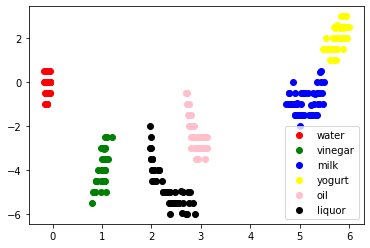

In [13]:
import os
folder_clean = 'D:\\Atom\\python\\data\\cleaned\\grill\\final'

colors = ["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta"]
matls = ['water', 'vinegar', 'milk', 'yogurt', 'oil', 'liquor']
ds = [7, 6, 6, 6, 6, 6]
# matls = ['water', 'vinegar', 'oil']
# ds = [7, 6, 6]
# matls = ['greentea', 'moli', 'wulong', 'water', 'vinegar', 'milk', 'oil', 'liquor', 'yogurt', 'colanosugar', 'cola']
d_p = []
d_r = []
f = []
y = []
j = 0
for d, matl in zip(ds, matls):
    df_f = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_f_kde.csv' % (d, matl)))
    df_t = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_t_kde.csv' %(d, matl)))
    diff_p = np.unwrap(df_f['PHASE']) - np.unwrap(df_t['PHASE'])
    diff_r = df_f['RSSI'] - df_t['RSSI']
    
    d_p.extend(diff_p)
    d_r.extend(diff_r)
    f.extend(df_f['CHANNEL'].values)
    y.extend(np.repeat([matl], len(diff_p)))
    plt.scatter(diff_p, diff_r, c=colors[j])
    
#     for i in range(len(diff_p)):
#         if diff_p[i] < 0:
#             diff_p[i] += 2*np.pi
#         else:
#             diff_p[i] -= 2*np.pi
            
#     d_p.extend(diff_p)
#     d_r.extend(diff_r)
#     f.extend(df_f['CHANNEL'].values)
#     y.extend(np.repeat([matl], len(diff_p)))
#     plt.scatter(d_p, d_r, c=colors[j])
    
    j += 1
plt.legend(matls)
X = np.column_stack((d_p, d_r))

# from sklearn.naive_bayes import GaussianNB
# model = GaussianNB()
# model.fit(X, y)

# from sklearn.tree import DecisionTreeClassifier
# tree = DecisionTreeClassifier().fit(X, y)
from sklearn.svm import SVC
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

# import pickle
# pickle.dump(clf, open('model_all_nopi.joblib', 'wb'))

water ['water' 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water'
 'water' 'water' 'water' 'water' 'yogurt' 'water' 'water' 'water' 'water'
 'water' 'water' 'water' 'water' 'water' 'water' 'yogurt' 'water' 'water'
 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water'
 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water'
 'water' 'water' 'water' 'yogurt' 'yogurt']
Correct 0.92
-------------------------------
vinegar ['water' 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'yogurt'
 'yogurt' 'water' 'water' 'water' 'water' 'yogurt' 'yogurt' 'water'
 'water' 'water' 'water' 'yogurt' 'water' 'water' 'milk' 'milk' 'milk'
 'milk' 'milk' 'milk' 'milk' 'milk' 'milk' 'milk' 'milk' 'milk' 'water'
 'milk' 'water' 'milk' 'milk' 'milk' 'milk' 'milk' 'water' 'milk' 'milk'
 'milk' 'milk' 'water' 'water']
Correct 0.0
-------------------------------
milk ['yogurt' 'water' 'yogurt' 'yogurt' 'yogurt' 'yogurt' 'yogurt' 'yogurt'
 'yogurt' 'yogurt' 

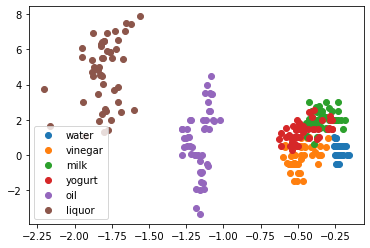

In [33]:
cnt = 0
correctcnt = 0
for matl in matls:
    df_f = pd.read_csv(os.path.join(folder_clean, 'd9_%s_f_kde.csv' % (matl)))
    df_t = pd.read_csv(os.path.join(folder_clean, 'd9_%s_t_kde.csv' %(matl)))
    diff_p = np.unwrap(df_f['PHASE']) - np.unwrap(df_t['PHASE'])
    diff_r = df_f['RSSI'] - df_t['RSSI']
    plt.scatter(diff_p, diff_r)
#     result = tree.predict(np.column_stack((diff_p, diff_r, df_t['CHANNEL'])))
    result = clf.predict(np.column_stack((diff_p, diff_r)))
    print(matl, result)
    correct = (result==matl).sum()
    print('Correct', correct/len(df_f))
    cnt += len(df_f)
    correctcnt += correct
    print('-------------------------------')
plt.legend(matls)
print(correctcnt, cnt, correctcnt/cnt)

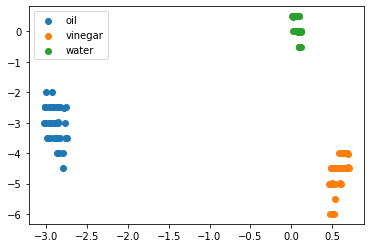

In [24]:
matls = ['oil', 'vinegar', 'water']
folder_outdoor = 'D:\\Atom\\python\\data\\cleaned\\grill\\outdoor'
for matl in matls:
    df_f = pd.read_csv(os.path.join(folder_outdoor, 'outdoor_d1_%s_front_kde_outdoor.csv' % (matl)))
    df_t = pd.read_csv(os.path.join(folder_outdoor, 'outdoor_d1_%s_tail_kde_outdoor.csv' %(matl)))
    diff_p = np.unwrap(df_f['PHASE']) - np.unwrap(df_t['PHASE'])
    diff_r = df_f['RSSI'] - df_t['RSSI']
    plt.scatter(diff_p, diff_r)

plt.legend(matls)

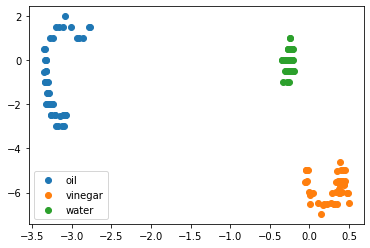

In [25]:
matls = ['oil', 'vinegar', 'water']
folder_outdoor = 'D:\\Atom\\python\\data\\cleaned\\grill\\noback'
for matl in matls:
    df_f = pd.read_csv(os.path.join(folder_outdoor, 'd1_%s_front_noback.csv' % (matl)))
    df_t = pd.read_csv(os.path.join(folder_outdoor, 'd1_%s_tail_noback.csv' %(matl)))
    diff_p = np.unwrap(df_f['PHASE']) - np.unwrap(df_t['PHASE'])
    diff_r = df_f['RSSI'] - df_t['RSSI']
    plt.scatter(diff_p, diff_r)

plt.legend(matls)

oil ['water' 'water' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil'
 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil'
 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil'
 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil' 'oil'
 'oil' 'oil' 'oil']
Correct 0.96
-------------------------------
vinegar ['vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar'
 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar'
 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar'
 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar'
 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar'
 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar'
 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar'
 'vinegar']
Correct 1.0
-------------------------------
water ['water' 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water'
 

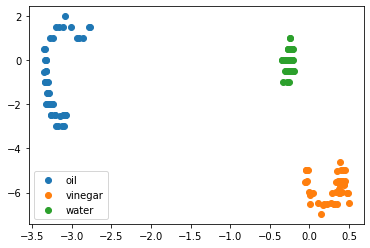

In [50]:
matls = ['oil', 'vinegar', 'water']
folder_outdoor = 'D:\\Atom\\python\\data\\cleaned\\grill\\noback'
cnt = 0
correctcnt = 0
for matl in matls:
    df_f = pd.read_csv(os.path.join(folder_outdoor, 'd1_%s_front_noback.csv' % (matl)))
    df_t = pd.read_csv(os.path.join(folder_outdoor, 'd1_%s_tail_noback.csv' % (matl)))
    diff_p = np.unwrap(df_f['PHASE']) - np.unwrap(df_t['PHASE'])
    diff_r = df_f['RSSI'] - df_t['RSSI']
    plt.scatter(diff_p, diff_r)
#     result = tree.predict(np.column_stack((diff_p, diff_r, df_t['CHANNEL'])))
    result = clf.predict(np.column_stack((diff_p, diff_r)))
    print(matl, result)
    correct = (result==matl).sum()
    print('Correct', correct/len(df_f))
    cnt += len(df_f)
    correctcnt += correct
    print('-------------------------------')
plt.legend(matls)
print(correctcnt, cnt, correctcnt/cnt)

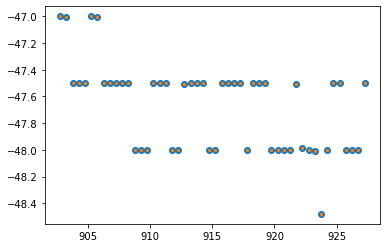

In [47]:
matl = 'oil'
df_f = pd.read_csv(os.path.join(folder_outdoor, 'd1_%s_front_noback.csv' % (matl)))
df_t = pd.read_csv(os.path.join(folder_outdoor, 'd1_%s_front_noback.csv' % (matl)))
plt.scatter(df_f['CHANNEL'], df_f['RSSI'])
plt.scatter(df_f['CHANNEL'], df_t['RSSI'], s=5)
plt.scatter
